In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import pandas as pd

Modele de Kelvin Voigt

In [31]:
j = complex(0,1)

def h_kvoigt(E, eta, omega):
    return 1/(E+j*omega*eta)

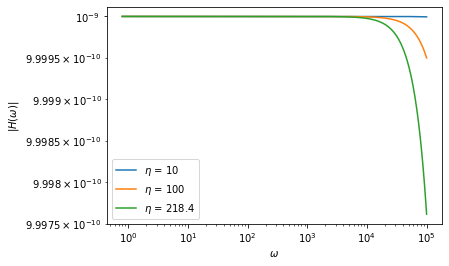

In [32]:
# Plot bodes for different values of eta
omega = np.logspace(-0.1, 5, 1000)
E = 10**9
etas = [10, 100, 2.1*104]
for eta in etas:
    plt.loglog(omega, np.abs(h_kvoigt(E, eta, omega)), label=r"$\eta$ = "+str(eta))
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|H(\omega)|$")
plt.legend()
plt.show()


Creation du signal

In [12]:
motif = pd.read_csv("motif.csv")
motif = motif.to_numpy() / 1000 # Convert in kg
motif = motif * 9.81 # Convert in N
S = 10**-4 # Surface de 1 cm2
motif = motif / S # Convert in Pa
# Reapeat the motif 10 times
n = 1000
sig = np.tile(motif, (n, 1))


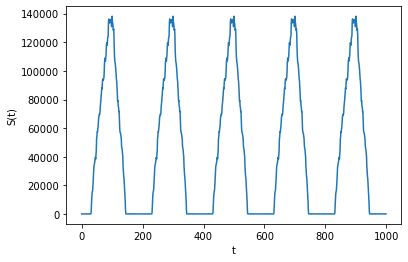

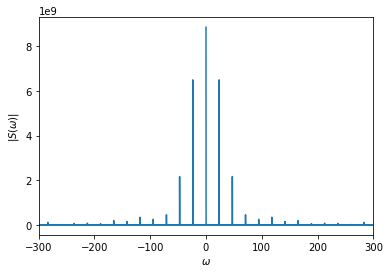

In [19]:
# Calculate the response using fft
sig_fft = np.fft.fft(sig, axis=0)
omega = np.fft.fftfreq(n*len(motif), d=1330*(10**-6)) * 2 * np.pi
# Plot the input signal and the fft
plt.plot(sig[:1000])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.show()
plt.plot(omega, np.abs(sig_fft))
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|S(\omega)|$")
plt.xlim(-300,300)
plt.show()



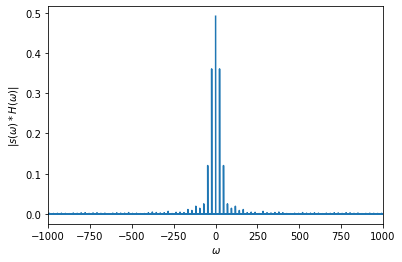

/Users/malau/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


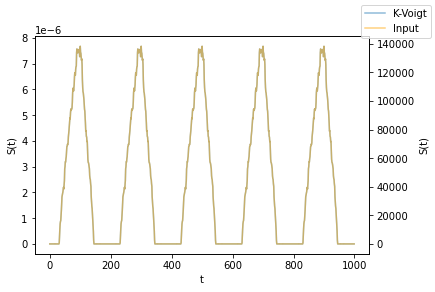

In [20]:
# Calculate the response using the K-Voigt model
eta = 2.1 * 104
E = 18*10**9
H = np.zeros(len(omega), dtype=complex)
for i in range(len(omega)):
    H[i] = sig_fft[i] * h_kvoigt(E, eta, omega[i])

# Invert the fft
sig_kvoigt = np.fft.ifft(H, axis=0)
# Plot the fft
plt.plot(omega, np.abs(H), label="K-Voigt")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|s(\omega)*H(\omega)|$")
plt.xlim(-1000, 1000)
plt.show()
# Plot the response and the input signal on different y scales
fig, ax1 = plt.subplots()
ax1.plot(sig_kvoigt[:1000], label="K-Voigt", alpha=0.5)
ax1.set_xlabel("t")
ax1.set_ylabel("S(t)")
ax2 = ax1.twinx()
ax2.plot(sig[:1000], color="orange", label="Input", alpha=0.5)
ax2.set_ylabel("S(t)")
fig.legend()
plt.show()

Model de maxwell weichert

No handles with labels found to put in legend.


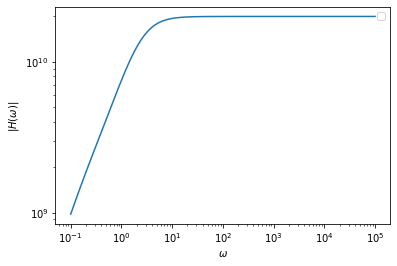

In [15]:
def h_burger(E1, E2, eta1, eta2, omega):
    jw = omega * j
    return (eta1 * jw + eta1 * eta2 * (-omega**2) / E2)/(1 + (eta1 / E2 + eta2/E2 + eta1/E1) * jw - (eta1 * eta2 / (E1 * E2)) * omega**2)

def h_burger2(E1,E2, tau, eta1, omega):
    return h_burger(E1, E2, eta1, E2*tau, omega)
# Plot bodes for different values of eta
omega = np.logspace(-1, 5, 1000)
E1 = 20*10**9
E2 = 15*10**9
eta1 = E1 * 0.5
tau = 3
plt.loglog(omega, np.abs(h_burger2(E1, E2, tau, eta1, omega)))
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|H(\omega)|$")
plt.legend()
plt.show()


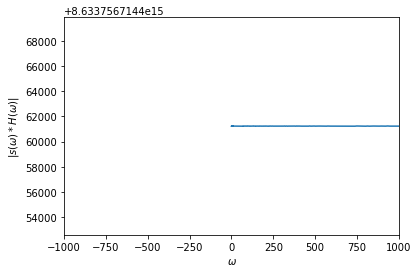

/Users/malau/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


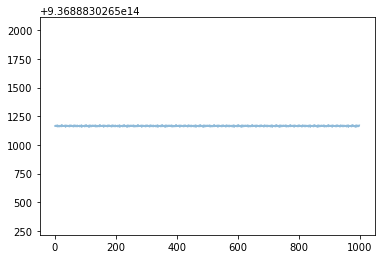

In [16]:
# Plot the response
sig_burger = np.zeros(len(omega), dtype=complex)
for i in range(len(omega)):
    sig_burger[i] = sig_fft[i] * h_burger2(E1, E2, tau, eta1, omega[i])

# Invert the fft
sig_burger = np.fft.ifft(sig_burger, axis=0)
# Plot the fft
plt.plot(omega, np.abs(sig_burger), label="Burger")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|s(\omega)*H(\omega)|$")
plt.xlim(-1000, 1000)
plt.show()
# Plot the response sig_burger
plt.plot(sig_burger[:1000], label="Burger", alpha=0.5)
